In [6]:
# ln -s ../code/analytic.py analytic.py
%matplotlib inline

import numpy as np
import pandas as pd
import math

import thinkstats2
import thinkplot

#import nsfg
#import first
#import brfss
#import scatter

In [7]:
def RMSE(estimates,actual):
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return math.sqrt(mse)

def SimulateSample(mu=90, sigma=7.5, n=9, m=1000):

    def Vertline(x, y=1):
        thinkplot.Plot([x,x],[0,y], color='0.8', linewidth=3)

    means=[]
    for j in range(m):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        means.append(xbar)
    
    cdf=thinkstats2.Cdf(means)
    ci=cdf.Percentile(5), cdf.Percentile(95)
    stderr = RMSE(means, mu)

    print(f'standard error: {stderr:.3f}')
    print(f'confidence interval: {ci[0]:.3f}, {ci[1]:.3f}')
    Vertline(ci[0])
    Vertline(ci[1])
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='sample mean', ylabel='CDF',
                     title='Sampling distribution')

standard error: 2.542
confidence interval: 85.981, 94.328


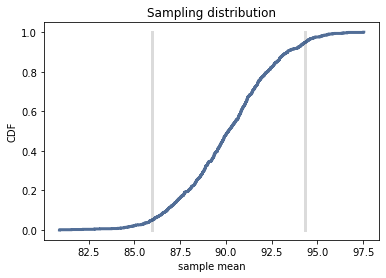

In [8]:
SimulateSample()

## Exponential distributions

In [9]:
sample = [5.384, 4.493, 19.198, 2.790, 6.122, 12.844]

In [10]:
def MeanError(estimates, actual):
    errors = [estimate - actual for estimate in estimates]
    return np.mean(errors)

In [11]:
# median of an exponential distribution is ln(2)/lambda
def Estimate(n=7, m=1000):
    lam=2

    means=[]
    medians=[]
    for _ in range(m):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = math.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)

    print(f'rmse L, {RMSE(means, lam):.2f}')
    print(f'rmse Lm, {RMSE(medians, lam):.2f}')
    print(f'mean error L, {MeanError(means, lam):.2f}')
    print(f'mean error Lm, {MeanError(medians, lam):.2f}')

In [12]:
Estimate()

rmse L, 1.09
rmse Lm, 1.94
mean error L, 0.33
mean error Lm, 0.52


## Exercises

In [13]:
import thinkstats2
import thinkplot

import math
import random
import numpy as np

from scipy import stats
import estimation as est

In [14]:
est.Estimate1(7, 1000)

Experiment 1
rmse xbar 0.3872245319517136
rmse median 0.45322630581231227


In [15]:
est.Estimate2(7, 1000)

Experiment 2
mean error biased -0.14032877758132564
mean error unbiased 0.002949759488453406


In [16]:
test = np.random.normal(90, 7.5, 10000)
cdf = thinkstats2.Cdf(test)

In [17]:
cdf

Cdf([ 55.39282229  60.21835366  62.35412432 ... 113.97486817 117.03751585
 118.87998831], [1.000e-04 2.000e-04 3.000e-04 ... 9.998e-01 9.999e-01 1.000e+00])

{'xscale': 'linear', 'yscale': 'linear'}

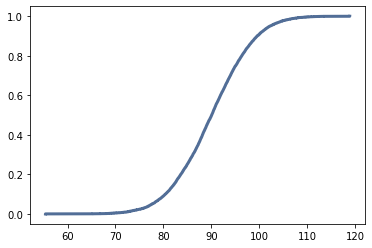

In [18]:
thinkplot.Cdf(cdf)

In [19]:
est.SimulateSample()

standard error 2.4630157574639946
confidence interval (86.05046485533383, 94.15183376080238)
Writing estimation1.pdf
Writing estimation1.png


<Figure size 576x432 with 0 Axes>

In [20]:
7.5/math.sqrt(9)

2.5

In [21]:
90 + np.array([1, -1]) * 1.67 * 7.5/math.sqrt(9)

array([94.175, 85.825])

In [22]:
import scipy.stats as sstats
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
def SampleExp(lam=2, n=10, m=100):
    L = []
    for _ in range(m):
        sample = sstats.expon.rvs(scale=lam, size = n)
        #est_L = np.log(2) / np.median(sample)
        est_L = np.mean(sample)
        L.append(est_L)

    print(f'Mean L: {np.mean(L)}')
    print(f'SE L: {np.std(L)/math.sqrt(n)}')

    

In [28]:
SampleExp(m=10000)

Mean L: 2.008895248360727
SE L: 0.20059171914478813
